In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv('sea_ice_temps.txt', header=None, names=['Temp'])
df.head()


,Temp
0,15.54
1,16.31
2,16.44
3,15.46
4,14.06


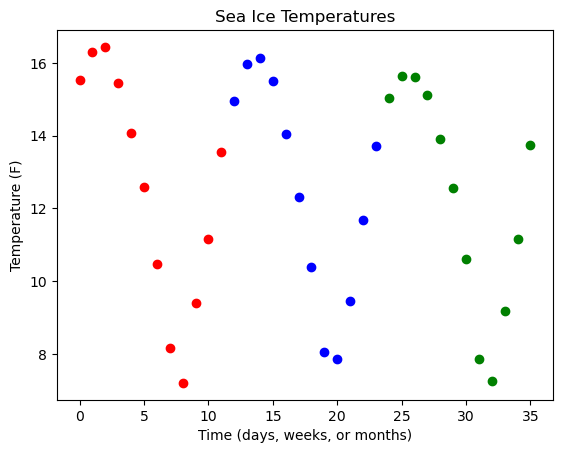

In [25]:
plt.scatter(df.index[:12], df['Temp'][:12], color='red', label='First 12')  #Example of poor programming
plt.scatter(df.index[12:24], df['Temp'][12:24], color='blue', label='Second 12')
plt.scatter(df.index[24:36], df['Temp'][24:36], color='green', label='Third 12')
plt.title('Sea Ice Temperatures')
plt.xlabel('Time (days, weeks, or months)')
plt.ylabel('Temperature (F)')
plt.show()

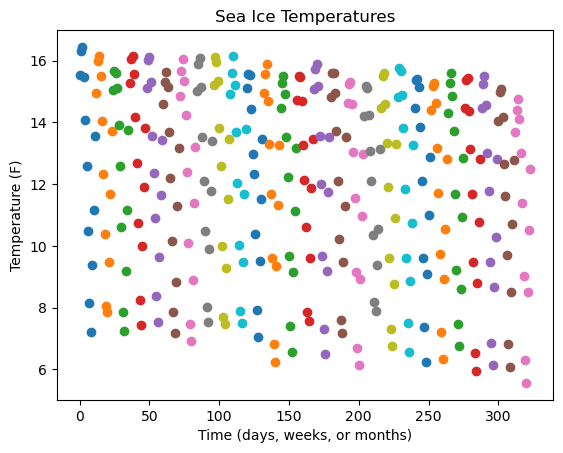

In [26]:
for i in range(0, 324, 12):
    plt.scatter(df.index[i:i+12], df['Temp'][i:i+12], label=f'{i}th 12')
plt.title('Sea Ice Temperatures')
plt.xlabel('Time (days, weeks, or months)')
plt.ylabel('Temperature (F)')
plt.show()

In [27]:
df.head()

,Temp
0,15.54
1,16.31
2,16.44
3,15.46
4,14.06


0, 12, 24, 36...
1, 12, 25, 37...
2, 14, 26, 38...
3, 15, 27, 39...
4, 16, 28, 40...
11, 23, 35, 47...

if we want to study months assuming this is monthly data, then we want to group multiples of 12. On group would be (0, 12, 24, 36,..) the next would be (1, 12, 25, 37, ...) and so on

this uses modulus 12 we are grouping them based on the remainder after we divide by 12 

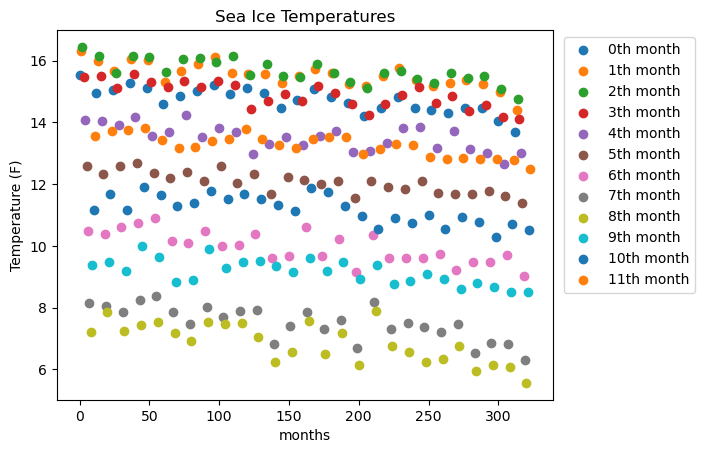

In [28]:
for i in range (0, 12, 1):
    plt.scatter(df.index[i::12], df['Temp'][i::12], label=f'{i}th month')
plt.title('Sea Ice Temperatures')
plt.xlabel('months')
plt.ylabel('Temperature (F)')
plt.legend(bbox_to_anchor=(1.3, 1), loc='upper right')
plt.show()

# slice: [start:stop:step] -> [::] => [0: -1: 1]



In [29]:
# A question to ask: Is the month (0-11) correlated with the temperature?
# lets group the data by month

df['Month'] = df.index % 12  # adding a month column with labels 0-11
df[273:280]

,Temp,Month
273,8.59,9
274,10.92,10
275,12.84,11
276,14.45,0
277,15.36,1
278,15.44,2
279,14.37,3


In [30]:
#Now lets check the correlation between the month and the temperature
df.corr()

,Temp,Month
Temp,1.000000,-0.650139
Month,-0.650139,1.000000


In [31]:
df['Year'] = df.index // 12
df.head()

,Temp,Month,Year
0,15.54,0,0
1,16.31,1,0
2,16.44,2,0
3,15.46,3,0
4,14.06,4,0


-0.65 shows strong negative correlation

In [32]:
df.corr()

,Temp,Month,Year
Temp,1.000000,-6.501385e-01,-1.117963e-01
Month,-0.650139,1.000000e+00,5.935741e-16
Year,-0.111796,5.935741e-16,1.000000e+00


In [33]:
# construct a dataset of temperatures based on month 10
df_month_10 = df[df['Month'] == 10]
df_month_10.head()

,Temp,Month,Year
10,11.16,10,0
22,11.69,10,1
34,11.17,10,2
46,11.91,10,3
58,11.64,10,4


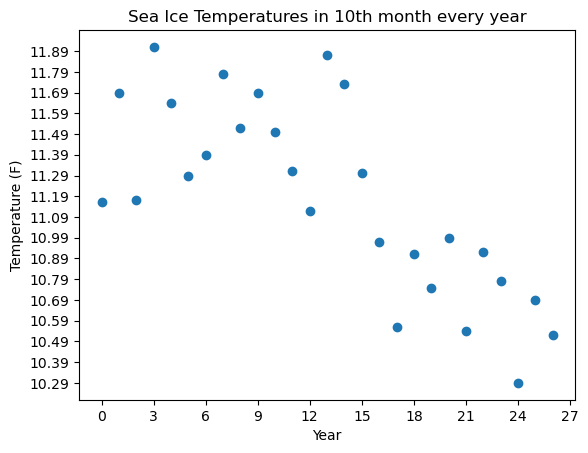

In [34]:
# plot the data of df_month_10 of year against temperature

plt.scatter(df_month_10['Year'], df_month_10['Temp'])
plt.title('Sea Ice Temperatures in 10th month every year')
plt.xlabel('Year')
plt.xticks(np.arange(0, 30, 3))
plt.ylabel('Temperature (F)')
plt.yticks(np.arange(10.29, 11.91, 0.1))
plt.show()

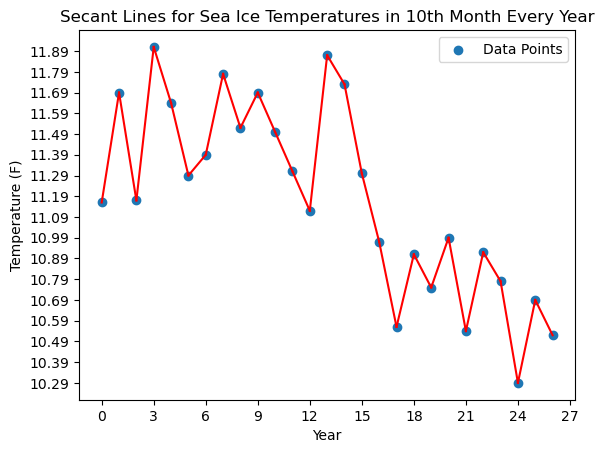

In [35]:
# Plot the data points
plt.scatter(df_month_10['Year'], df_month_10['Temp'], label='Data Points')

# Draw secant lines
for i in range(len(df_month_10) - 1):
    x_values = [df_month_10['Year'].iloc[i], df_month_10['Year'].iloc[i + 1]]
    y_values = [df_month_10['Temp'].iloc[i], df_month_10['Temp'].iloc[i + 1]]
    plt.plot(x_values, y_values, color='red')

plt.title('Secant Lines for Sea Ice Temperatures in 10th Month Every Year')
plt.xlabel('Year')
plt.xticks(np.arange(0, 30, 3))
plt.ylabel('Temperature (F)')
plt.yticks(np.arange(10.29, 11.91, 0.1))
plt.legend()
plt.show()

In [42]:
# Compute the estimates of the derivatives of the temperature with respect to the time

temps = df_month_10['Temp']
print(type(temps))

temps = list(df_month_10['Temp'])
print((temps))

<class 'pandas.core.series.Series'>
[11.16, 11.69, 11.17, 11.91, 11.64, 11.29, 11.39, 11.78, 11.52, 11.69, 11.5, 11.31, 11.12, 11.87, 11.73, 11.3, 10.97, 10.56, 10.91, 10.75, 10.99, 10.54, 10.92, 10.78, 10.29, 10.69, 10.52]


In [46]:
est_derivs = []

for i in range(1,len(temps)):
    est_deriv = (temps[i] - temps[i-1]) / (i - (i - 1)) # Dy/Dx
    est_derivs.append(est_deriv)

    print(est_derivs)

[0.5299999999999994]
[0.5299999999999994, -0.5199999999999996]
[0.5299999999999994, -0.5199999999999996, 0.7400000000000002]
[0.5299999999999994, -0.5199999999999996, 0.7400000000000002, -0.2699999999999996]
[0.5299999999999994, -0.5199999999999996, 0.7400000000000002, -0.2699999999999996, -0.3500000000000014]
[0.5299999999999994, -0.5199999999999996, 0.7400000000000002, -0.2699999999999996, -0.3500000000000014, 0.10000000000000142]
[0.5299999999999994, -0.5199999999999996, 0.7400000000000002, -0.2699999999999996, -0.3500000000000014, 0.10000000000000142, 0.3899999999999988]
[0.5299999999999994, -0.5199999999999996, 0.7400000000000002, -0.2699999999999996, -0.3500000000000014, 0.10000000000000142, 0.3899999999999988, -0.2599999999999998]
[0.5299999999999994, -0.5199999999999996, 0.7400000000000002, -0.2699999999999996, -0.3500000000000014, 0.10000000000000142, 0.3899999999999988, -0.2599999999999998, 0.16999999999999993]
[0.5299999999999994, -0.5199999999999996, 0.7400000000000002, -0.

In [51]:
# what do you estimate the derivative to be at the 10th month of the 18th year?

print(est_derivs[17])
print(est_derivs[18])

0.34999999999999964
-0.16000000000000014


In [52]:
# the averge of the two slopes estimating the derivative
print((est_derivs[17] + est_derivs[18]) / 2)

0.09499999999999975


In [53]:
# Compute the slope of the secant line between year 17 and year 19

print((temps[19]-temps[17])/(19-17))

0.09499999999999975


First, we are interested in slopes of secant line because
* Local estimate of a rate of change (ex: the change in temperature in year 18 was roughly 0.09F restricting to month 10)

When we compute these slopes, we want our target x-value to be **internal** to the points we use. We should pick
* Similar points
* closest to our target

